In [ ]:
#测试工具

In [186]:


import networkx as nx
import networkx.algorithms.community as nx_comm
from itertools import combinations

G = nx.Graph()
G.add_edges_from([(6,7),(6,1),(6,12),(7,12),(7,1),(1,12),(12,11),(12,2),(2,11),
                    (9,2),(9,10),(9,3),(2,10),(10,3),(3,4),(3,8),(3,5),(4,5),(4,8),(5,8)])
cover1 = [{1,6,11,7,12},{3,5,4,8},{10,2,9}]
cover2 = [{1,2,7,11,6,12},{3,5,4,8},{10,9,2,3}]

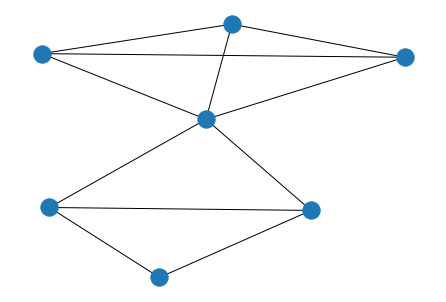

In [192]:
G2 = nx.Graph()
net1 = combinations(range(1,5),2)
net2 = combinations(range(4,8),2)
G2.add_edges_from([x for x in net1])
G2.add_edges_from([x for x in net2])
G2.remove_edge(4,6)
nx.draw(G2)
cover3=[{1,2,3,4},{4,5,6,7}]
cover4 = [{1,2,3,4},{5,6,7}]

In [193]:

from itertools import product
from itertools import permutations
from itertools import combinations

m = len(nx.edges(G2))
A = nx.to_numpy_array(G2,dtype=int)
k =  len(cover3)
node_dict = {}
# 统计每个节点的社团个数
for i in range(len(cover3)):
    for node in cover3[i]:
        node_dict[node] = node_dict.get(node,0) + 1

list2 =[]
for i in range(k):
    list1 =[]
    for v,w in combinations(cover3[i],2):
        # print(v,w)
        list1.append((1/(node_dict[v]*node_dict[w])) * (A[v-1][w-1] - (G2.degree(v)*G2.degree(w)/(m*2))))
    list2 .append(sum(list1))
Qov = 1/(2*m)*sum(list2)


In [194]:
Qov

0.19938016528925623

In [225]:
#KKM RC

import networkx as nx
import copy
from itertools import combinations,product,chain

#get the nodes in the input community_labels vector, but the label information is lost

def Cal_KKM_RC(graph,cover):

    k = len(cover)
    n = len(graph.nodes())
    A = nx.convert_matrix.to_numpy_array(graph)
    
    Ls =[]
    for i in range(k):
        L = sum([A[v-1][w-1] for v,w in combinations(cover[i],2)])
        Ls.append(L/len(cover[i]))
    
    KKM = 2*(n-k)-sum(Ls)
    Ls = []
    for i in range(k):
        C_j = copy.deepcopy(cover)
        C_j.remove(cover[i])
        C_j = set(chain.from_iterable(C_j))
        L = sum([A[v-1][w-1] for v,w in product(cover[i],C_j)])
        Ls.append(L/len(cover[i]))
    RC = sum(Ls)
    return KKM, RC

In [227]:
G2 = nx.Graph()
net1 = combinations(range(1,5),2)
net2 = combinations(range(4,8),2)
G2.add_edges_from([x for x in net1])
G2.add_edges_from([x for x in net2])
G2.remove_edge(4,6)
cover3=[{1,2,3,4},{4,5,6,7}]
cover4 = [{1,2,3,4},{5,6,7}]
KKM, RC = Cal_KKM_RC(G2,cover4)
print(KKM,RC)

7.5 1.1666666666666665


In [223]:

import networkx as nx
import copy
import itertools
from itertools import combinations

def get_communities_list(community_labels):
    # community_labels =[12, 2, 4, 4, 5, 12, 7, 4, 9, 9, 2, 12]
    # output [[0, 5, 11], [1, 10], [2, 3, 7], [4], [6], [8, 9]]
    appeared = set()
    communities = []
    for i in community_labels:
        if i not in appeared:
            temp = []
            appeared.add(i)
            for j,k in enumerate(community_labels):
                if k == i:
                    temp.append(j)
            communities.append(temp)
    return communities

def Cal_KKM_RC(graph,cover):

    k = len(cover)
    n = len(graph.nodes())

    adjacent_matrix = nx.convert_matrix.to_numpy_array(graph)

    L = []
    for i in cover:
        inside_sum = []
        for v,w in combinations(i,2):
            inside_sum.append(adjacent_matrix[v-1][w-1])
        L.append(sum(inside_sum)/len(i))
    

    KKM = 2*float((n-k)) - sum(L)

    RC = 0.0
    nodes = list(range(1,n+1))
    for i in cover:
        temp = 0
        omega = cover.copy()
        omega.remove(i)
        diff = list(itertools.chain.from_iterable(omega))
        for k in i:
            for w in diff:
                temp += adjacent_matrix[k-1][w-1]
        RC += temp /len(i)   

    return KKM,RC

In [224]:
KKM,RC = Cal_KKM_RC(G2,cover4)
print(KKM,RC)

7.5 1.1666666666666665


In [241]:

b=[1,1,1,0,0,1,0,1,1,0,1,0]
G.add_edges_from([(6,7),(6,1),(6,12),(7,12),(7,1),(1,12),(12,11),(12,2),(2,11),
                    (9,2),(9,10),(9,3),(2,10),(10,3),(3,4),(3,8),(3,5),(4,5),(4,8),(5,8)])
cover,binary= test(G,b)
print()
print(binary)


[[0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0]]

[[0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0]]


In [321]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.Graph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test():
    # to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    from community import community_louvain

    g = nx.karate_club_graph()
    partition = community_louvain.best_partition(g)

    pos = community_layout(g, partition)
   
    nx.draw_networkx(g, pos,node_color=list(partition.values()),node_size = 100,font_color='r',label = {28:'number 28'})
    limits = plt.axis("off") 
    plt.show()
    return

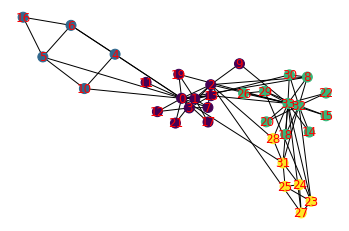

In [322]:
test()

In [323]:
    from community import community_louvain

    g = nx.karate_club_graph()
    partition = community_louvain.best_partition(g)

In [324]:
type(partition)

dict

In [325]:
print(partition)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 0, 8: 2, 9: 2, 10: 1, 11: 0, 12: 0, 13: 0, 14: 2, 15: 2, 16: 1, 17: 0, 18: 2, 19: 0, 20: 2, 21: 0, 22: 2, 23: 3, 24: 3, 25: 3, 26: 2, 27: 3, 28: 3, 29: 2, 30: 2, 31: 3, 32: 2, 33: 2}
